# NEPSE Stock Price Prediction with Sentiment Analysis

This notebook demonstrates a step-by-step implementation of stock price prediction for the Nepal Stock Exchange (NEPSE) using LSTM neural networks and sentiment analysis.

## Key Features

1. **Multi-feature Prediction**: Predicts multiple stock price features including open, high, low, close prices, and trading volume
2. **Sentiment Integration**: Incorporates sentiment analysis (compound score) to capture market sentiment's impact
3. **Technical Indicators**: Utilizes various technical indicators like moving averages, RSI, momentum, and volatility
4. **Multi-step Forecasting**: Capable of predicting multiple days ahead
5. **Comprehensive Evaluation**: Provides detailed evaluation metrics and visualizations

# Data Visulaization

In [1]:
import pandas as pd
import numpy as np

# Read the NEPSE sentiment with price data
df = pd.read_csv('./data/NEPSE_SENTIMENT_WITH_PRICE.csv')

# Display the first few rows to understand the data structure
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Check for any missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# Get basic statistics of the numerical columns
print("\nBasic statistics of numerical columns:")
display(df.describe())


Data shape: (3964, 16)

First 5 rows:


,title,slug,published date,url,symbol,sentiment,compound,positive,neutral,negative,open,high,low,close,volume,change
0,"NEPSE Slumps Below 2600 To Close at 2,595.96 L...",nepse-slumps-below-2600-to-close-at-259596-lev...,2025-01-15,https://www.sharesansar.com/newsdetail/nepse-s...,NEPSE,Neutral,0.0000,0.000,1.000,0.0,2596.83,2596.83,2596.83,2596.83,5.824904e+09,0.07
1,"NEPSE to Remain Closed Today, Govt Declares Pu...",nepse-to-remain-closed-today-govt-declares-pub...,2025-01-14,https://www.sharesansar.com/newsdetail/nepse-t...,NEPSE,Positive,0.4019,0.162,0.838,0.0,2610.05,2610.05,2610.05,2610.05,6.650883e+09,-0.59
2,NEPSE Index Records Three Consecutive Days of ...,nepse-index-records-three-consecutive-days-of-...,2025-01-13,https://www.sharesansar.com/newsdetail/nepse-i...,NEPSE,Neutral,0.0000,0.000,1.000,0.0,2610.05,2610.05,2610.05,2610.05,6.650883e+09,-0.59
3,NEPSE Index Plunges 25.41 Points; All Sectors ...,nepse-index-plunges-2541-points-all-sectors-cl...,2025-01-12,https://www.sharesansar.com/newsdetail/nepse-i...,NEPSE,Neutral,0.0000,0.000,1.000,0.0,2651.68,2651.68,2651.68,2651.68,3.997909e+09,-0.96
4,NEPSE Declines By 0.68% After 6 Days of Consec...,nepse-declines-by-068-after-6-days-of-consecut...,2025-01-09,https://www.sharesansar.com/newsdetail/nepse-d...,NEPSE,Positive,0.7964,0.323,0.677,0.0,2656.50,2656.50,2656.50,2656.50,7.305343e+09,-0.68



Missing values in each column:


title             0
slug              0
published date    0
url               0
symbol            0
sentiment         0
compound          0
positive          0
neutral           0
negative          0
open              0
high              0
low               0
close             0
volume            0
change            2
dtype: int64


Basic statistics of numerical columns:


,compound,positive,neutral,negative,open,high,low,close,volume,change
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3.964000e+03,3962.000000
mean,0.133958,0.104520,0.846417,0.049067,1708.117240,1708.117240,1708.117240,1708.117240,2.397524e+09,0.014099
std,0.374048,0.125465,0.135240,0.085943,575.049574,575.049574,575.049574,575.049574,3.669079e+09,0.881525
min,-0.895700,0.000000,0.238000,0.000000,486.000000,486.000000,486.000000,486.000000,0.000000e+00,-5.180000
25%,0.000000,0.000000,0.750000,0.000000,1230.392500,1230.392500,1230.392500,1230.392500,3.082076e+08,0.000000
50%,0.000000,0.000000,0.852500,0.000000,1554.555000,1554.555000,1554.555000,1554.555000,9.211715e+08,0.000000
75%,0.440400,0.185000,1.000000,0.104250,2067.357500,2067.357500,2067.357500,2067.357500,2.998252e+09,0.000000
max,0.920100,0.762000,1.000000,0.528000,3208.530800,3208.530800,3208.530800,3208.530800,2.995852e+10,6.010000


/var/folders/41/kw75tbrn5k71q65j5pt31cg00000gn/T/ipykernel_9714/3333099138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'blue'])


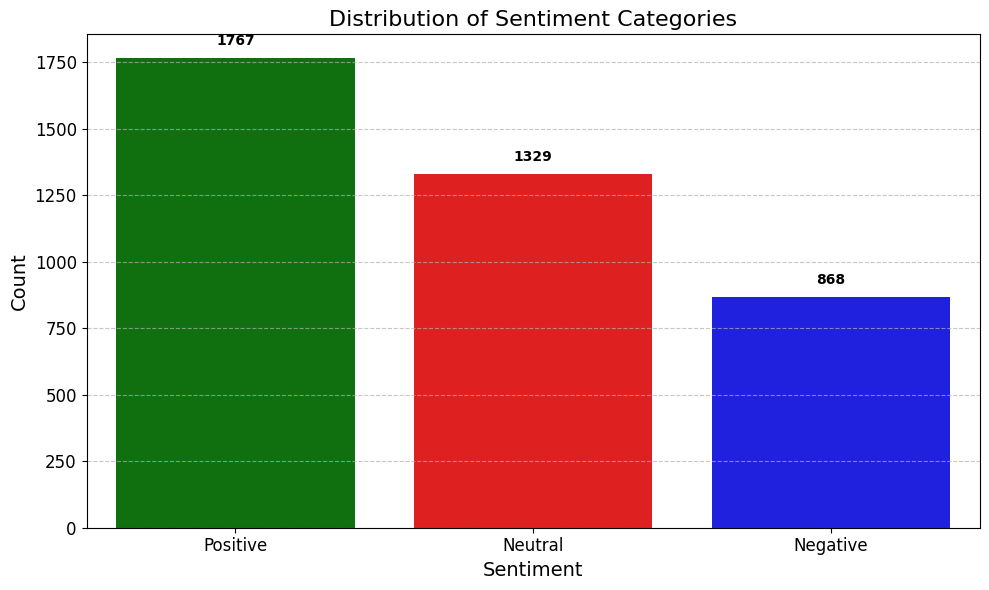

Sentiment Distribution (%):
Positive: 44.58%
Neutral: 33.53%
Negative: 21.90%


In [2]:
# Create a bar chart showing counts of positive, negative, and neutral sentiment
sentiment_counts = df['sentiment'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'blue'])

# Add count labels on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 50, str(count), ha='center', fontweight='bold')

plt.title('Distribution of Sentiment Categories', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print percentage distribution
sentiment_percentage = sentiment_counts / sentiment_counts.sum() * 100
print("Sentiment Distribution (%):")
for sentiment, percentage in sentiment_percentage.items():
    print(f"{sentiment}: {percentage:.2f}%")

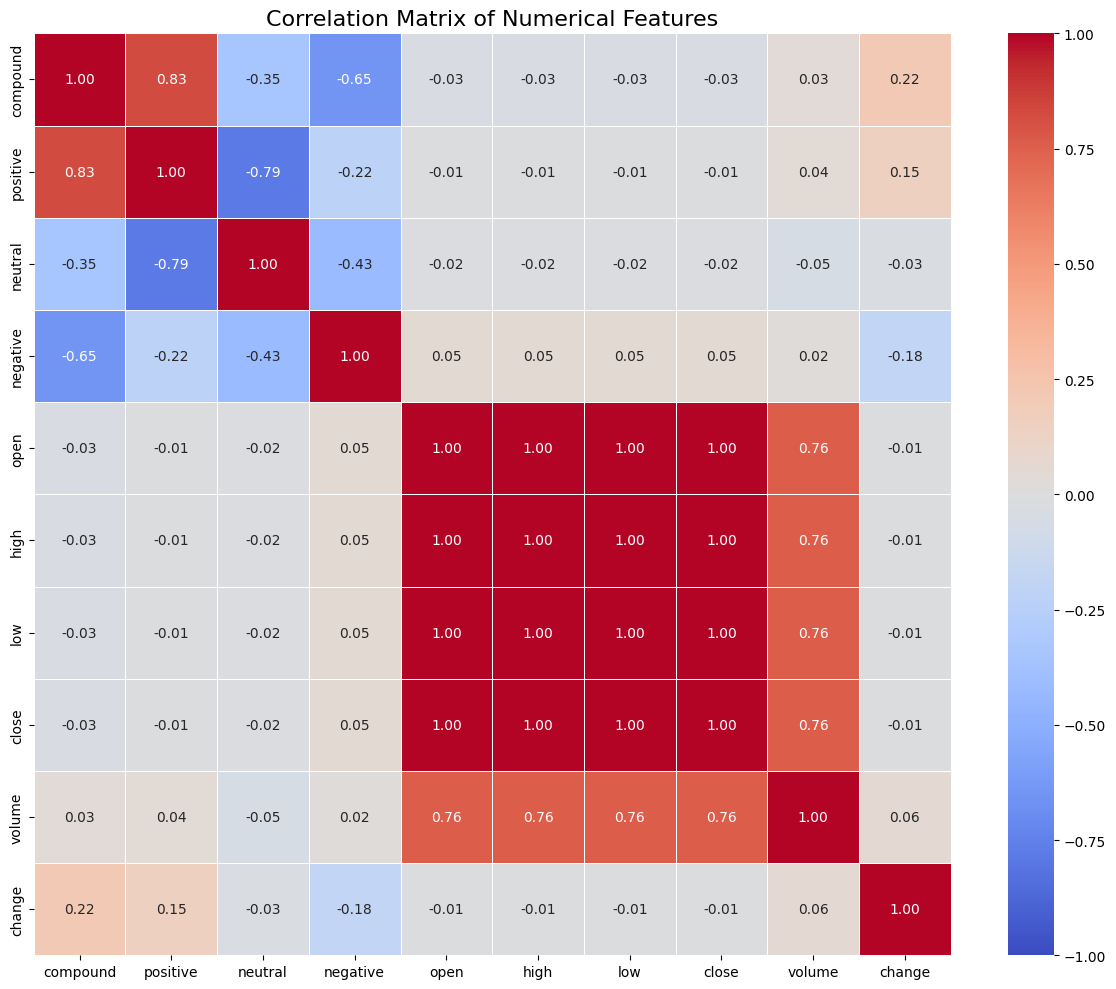


Strongest correlations (|correlation| > 0.5):
open — high: 1.000
open — low: 1.000
open — close: 1.000
high — low: 1.000
high — close: 1.000
low — close: 1.000
compound — positive: 0.825
positive — neutral: -0.785
open — volume: 0.764
high — volume: 0.764
low — volume: 0.764
close — volume: 0.764
compound — negative: -0.652


In [3]:
# Create a correlation matrix heatmap to visualize relationships between numerical features
plt.figure(figsize=(12, 10))

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            linewidths=0.5,       # Width of lines between cells
            fmt='.2f',            # Format for correlation values (2 decimal places)
            vmin=-1, vmax=1)      # Range for correlation values

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Print the strongest correlations (absolute value > 0.5, excluding self-correlations)
print("\nStrongest correlations (|correlation| > 0.5):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

# Sort by absolute correlation value (descending)
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the results
for var1, var2, corr in strong_correlations:
    print(f"{var1} — {var2}: {corr:.3f}")

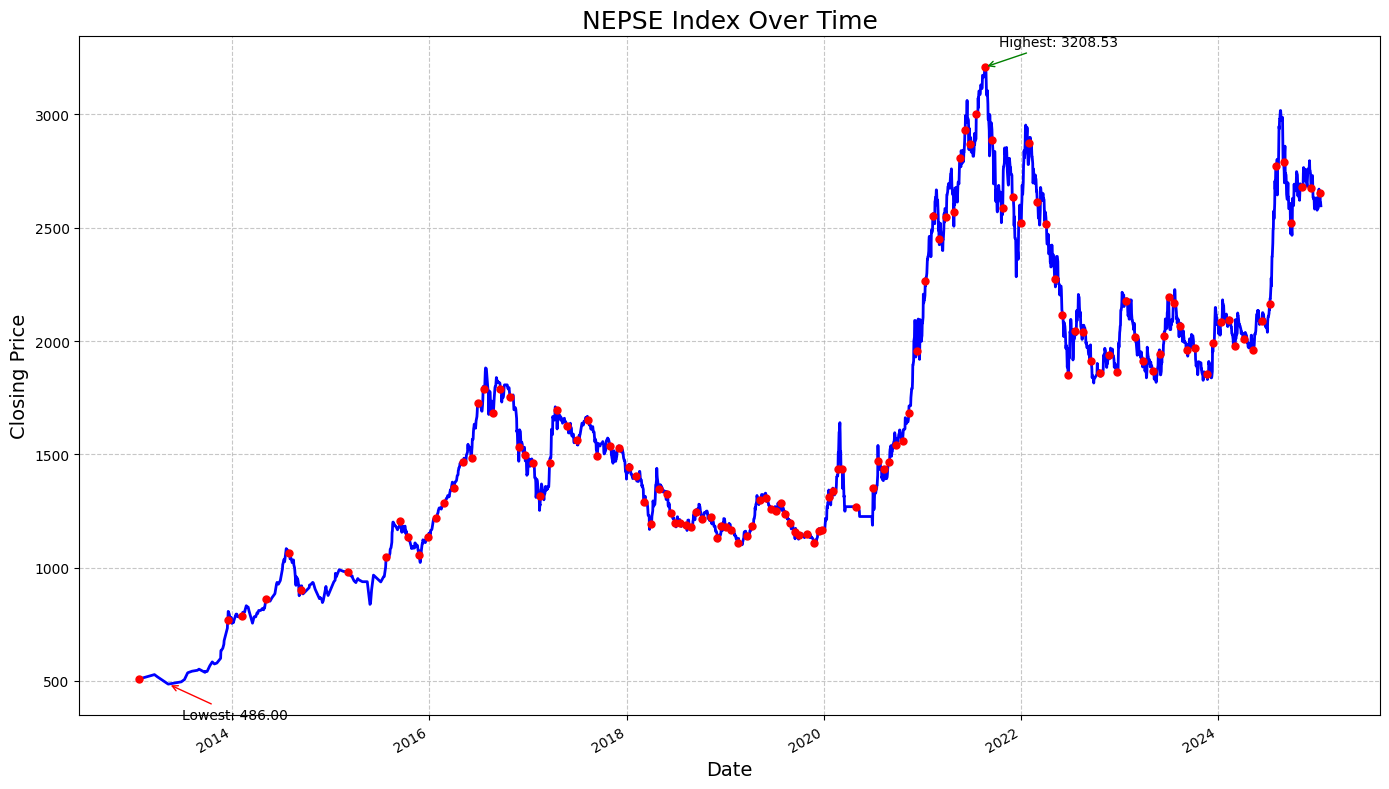

Date range: 2013-01-20 00:00:00 to 2025-01-15 00:00:00
Highest closing price: 3208.53 on 2021-08-19
Lowest closing price: 486.00 on 2013-05-10
Average closing price: 1708.12
Price volatility (std dev): 575.05


In [4]:
# Create a line graph of stock prices over time
plt.figure(figsize=(14, 8))

# Convert published date column to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['published date']):
    df['published date'] = pd.to_datetime(df['published date'])

# Sort the dataframe by published date to ensure proper chronological order
df_sorted = df.sort_values('published date')

# Plot the closing prices
plt.plot(df_sorted['published date'], df_sorted['close'], linewidth=2, color='blue')

# Add markers at specific intervals for better readability
plt.plot(df_sorted['published date'][::30], df_sorted['close'][::30], 'o', color='red', markersize=5)

# Customize the plot
plt.title('NEPSE Index Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Format the x-axis to show dates nicely
plt.gcf().autofmt_xdate()
plt.tight_layout()

# Add annotations for highest and lowest points
highest_idx = df_sorted['close'].idxmax()
lowest_idx = df_sorted['close'].idxmin()

highest_date = df_sorted.loc[highest_idx, 'published date']
highest_price = df_sorted.loc[highest_idx, 'close']
lowest_date = df_sorted.loc[lowest_idx, 'published date']
lowest_price = df_sorted.loc[lowest_idx, 'close']

plt.annotate(f'Highest: {highest_price:.2f}', 
             xy=(highest_date, highest_price),
             xytext=(10, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'))

plt.annotate(f'Lowest: {lowest_price:.2f}', 
             xy=(lowest_date, lowest_price),
             xytext=(10, -25), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

# Print some statistics about the stock prices
print(f"Date range: {df_sorted['published date'].min()} to {df_sorted['published date'].max()}")
print(f"Highest closing price: {highest_price:.2f} on {highest_date.date()}")
print(f"Lowest closing price: {lowest_price:.2f} on {lowest_date.date()}")
print(f"Average closing price: {df_sorted['close'].mean():.2f}")
print(f"Price volatility (std dev): {df_sorted['close'].std():.2f}")

## Step 1: Import Required Libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import (
    mean_absolute_percentage_error, 
    mean_absolute_error, 
    mean_squared_error, 
    r2_score,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load and Prepare Data

In [6]:
# Define features
core_features = ['open', 'high', 'low', 'close', 'volume']
sentiment_feature = 'compound'

# Load historical data
df = pd.read_csv('./data/NEPSE_SENTIMENT_WITH_PRICE.csv')

# Convert date to datetime
df['published date'] = pd.to_datetime(df['published date'])

# Sort by date
df = df.sort_values('published date')

# Handle missing values
for feature in core_features + [sentiment_feature]:
    if feature in df.columns:
        if feature == sentiment_feature:
            df[feature] = df[feature].fillna(df[feature].mean())
        else:
            df[feature] = df[feature].fillna(method='ffill')

print("Data loaded and preprocessed successfully!")

Data loaded and preprocessed successfully!


## Step 3: Add Technical Indicators

In [7]:
# Calculate moving averages
df['ma5'] = df['close'].rolling(window=5).mean()
df['ma20'] = df['close'].rolling(window=20).mean()

# Calculate RSI (Relative Strength Index)
delta = df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['rsi'] = 100 - (100 / (1 + rs))

# Calculate price momentum
df['momentum'] = df['close'].pct_change(periods=5)

# Calculate volatility
df['volatility'] = df['close'].rolling(window=10).std()

# Calculate price change
df['price_change'] = df['close'].pct_change()

# Fill NaN values created by indicators
df = df.fillna(method='bfill')

# Define technical indicators
technical_indicators = ['ma5', 'ma20', 'rsi', 'momentum', 'volatility', 'price_change']

print("Technical indicators added successfully!")

Technical indicators added successfully!


## Step 4: Prepare Data for Training

In [8]:
# Define sequence length and forecast horizon
sequence_length = 60
forecast_horizon = 5

# Combine all features
total_features = core_features + [sentiment_feature] + technical_indicators

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[total_features])

# Create sequences
X = []
y = []

for i in range(len(scaled_data) - sequence_length - forecast_horizon + 1):
    X.append(scaled_data[i:(i + sequence_length)])
    y.append(scaled_data[i + sequence_length:i + sequence_length + forecast_horizon])

X = np.array(X)
y = np.array(y)

# Split data
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (3120, 60, 12)
Validation data shape: (780, 60, 12)


## Step 5: Build and Train the Model

In [9]:
# Build the model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense((len(total_features)) * forecast_horizon)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train, y_train.reshape(y_train.shape[0], -1),
    validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

print("Model trained successfully!")

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.0842 - mae: 0.2119 - val_loss: 0.0130 - val_mae: 0.0754 - learning_rate: 0.0010
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0152 - mae: 0.0842 - val_loss: 0.0102 - val_mae: 0.0638 - learning_rate: 0.0010
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0117 - mae: 0.0724 - val_loss: 0.0096 - val_mae: 0.0602 - learning_rate: 0.0010
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0101 - mae: 0.0656 - val_loss: 0.0089 - val_mae: 0.0563 - learning_rate: 0.0010
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0095 - mae: 0.0627 - val_loss: 0.0094 - val_mae: 0.0564 - learning_rate: 0.0010
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0091 - mae: 0.0609 - val_loss: 0.0085 - val_mae: 0.0528 - learning_rate: 0.0010
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.0090 - mae: 0.0595 - val_loss: 0.0087 - val_mae: 0.0562 - learning_rate: 0.0010
Epoch

## Step 6: Visualize Training Results

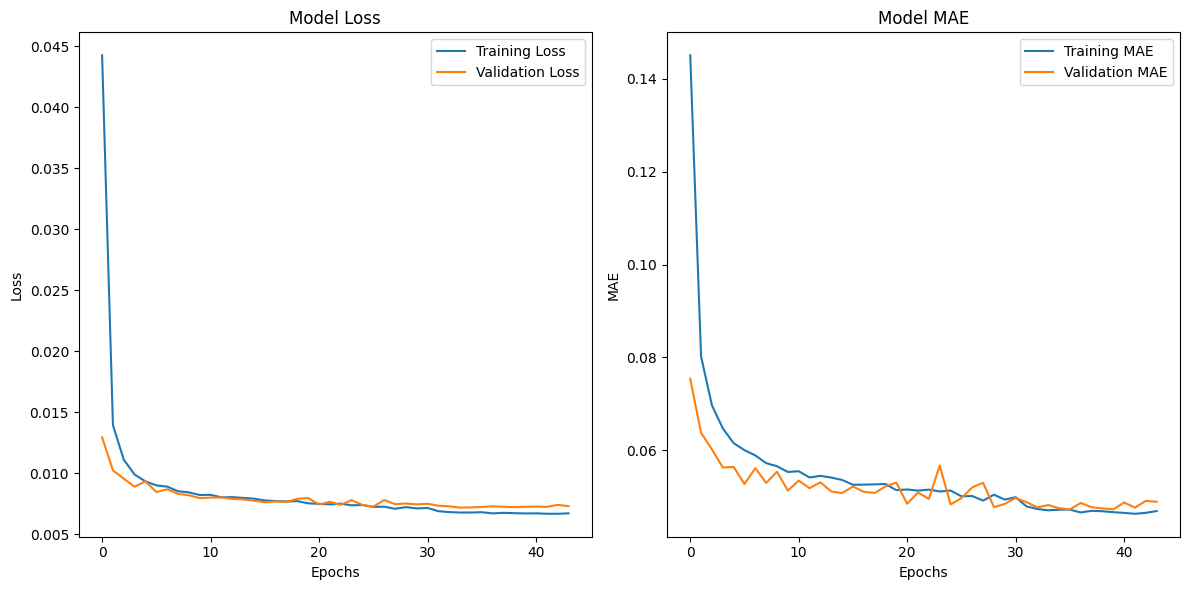

In [10]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

## Step 7: Make Predictions

In [11]:
# Use the last sequence from historical data
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, len(total_features))

# Make predictions
predictions_scaled = []
current_sequence = last_sequence

for _ in range(forecast_horizon):
    next_day_pred = model.predict(current_sequence)
    next_day_pred_reshaped = next_day_pred.reshape(1, forecast_horizon, len(total_features))
    next_day_scaled = next_day_pred_reshaped[0, 0, :].reshape(1, len(total_features))
    predictions_scaled.append(next_day_scaled)
    
    current_sequence = np.concatenate([
        current_sequence[:, 1:, :], 
        next_day_scaled.reshape(1, 1, len(total_features))
    ], axis=1)

# Inverse transform predictions
predictions = scaler.inverse_transform(np.vstack(predictions_scaled))

# Create DataFrame for predictions
prediction_df = pd.DataFrame(predictions, columns=total_features)
print("\nPredictions for the next 5 days:")
print(prediction_df.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Predictions for the next 5 days:
          open         high          low        close        volume  compound  \
0  2601.350098  2605.250000  2605.040039  2597.550049  6.615394e+09      0.07   
1  2632.030029  2625.129883  2636.879883  2621.629883  7.179463e+09      0.09   
2  2648.760010  2634.729980  2652.770020  2632.050049  7.461788e+09      0.09   
3  2655.030029  2639.050049  2660.250000  2635.959961  7.500607e+09      0.09   
4  2659.939941  2643.389893  2667.770020  2640.500000  7.466762e+09      0.09   

           ma5         ma20        rsi  momentum  volatility  price_change  
0  2600.350098  2564.919922  58.310001     -0.01   28.010000           0.0  
1  2623.540039  2587.629883  61.500000     -0.00   27.400000           0.0  
2  2635.989990  2605.149902  61.450001      0.00   27.469

## Step 8: Evaluate Model Performance

In [12]:
# Get validation predictions
val_predictions = model.predict(X_val)
val_predictions = val_predictions.reshape(val_predictions.shape[0], forecast_horizon, len(total_features))

# Inverse transform validation predictions
val_predictions_original = np.zeros_like(val_predictions)
for i in range(forecast_horizon):
    val_predictions_original[:, i, :] = scaler.inverse_transform(val_predictions[:, i, :])

# Calculate evaluation metrics
evaluation_results = []
for i, feature in enumerate(total_features):
    actual = df[feature].values[-len(val_predictions):]
    predicted = val_predictions_original[:, 0, i]
    
    mape = mean_absolute_percentage_error(actual, predicted) * 100
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    
    evaluation_results.append({
        'Metric': feature,
        'MAPE (%)': mape,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })

# Display evaluation metrics
evaluation_df = pd.DataFrame(evaluation_results)
print("\nModel Evaluation Metrics:")
print(evaluation_df.round(4))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Model Evaluation Metrics:
          Metric      MAPE (%)           MAE          RMSE  R2 Score
0           open  2.641700e+00  5.800800e+01  7.443220e+01    0.9378
1           high  2.687100e+00  5.892530e+01  7.552390e+01    0.9359
2            low  2.783100e+00  6.100440e+01  7.818180e+01    0.9313
3          close  2.613200e+00  5.741310e+01  7.427750e+01    0.9380
4         volume  2.748752e+02  1.417918e+09  2.413071e+09    0.7411
5       compound  1.174894e+16  3.250000e-01  3.842000e-01   -0.0452
6            ma5  2.424100e+00  5.245190e+01  6.659490e+01    0.9497
7           ma20  1.730200e+00  3.648820e+01  4.390310e+01    0.9773
8            rsi  1.354096e+16  1.352220e+01  1.739320e+01    0.4853
9       momentum  9.191682e+13  2.430000e-02  3.120000e-02   -0.4672
10    volatility  4.169570e+01  1.066900e+01  1.484790e+01    0.3503
11  price_change  4.174283e+14  7.500000e-03  1.150000e-02   -0.0388


## Step 9: Visualize Predictions

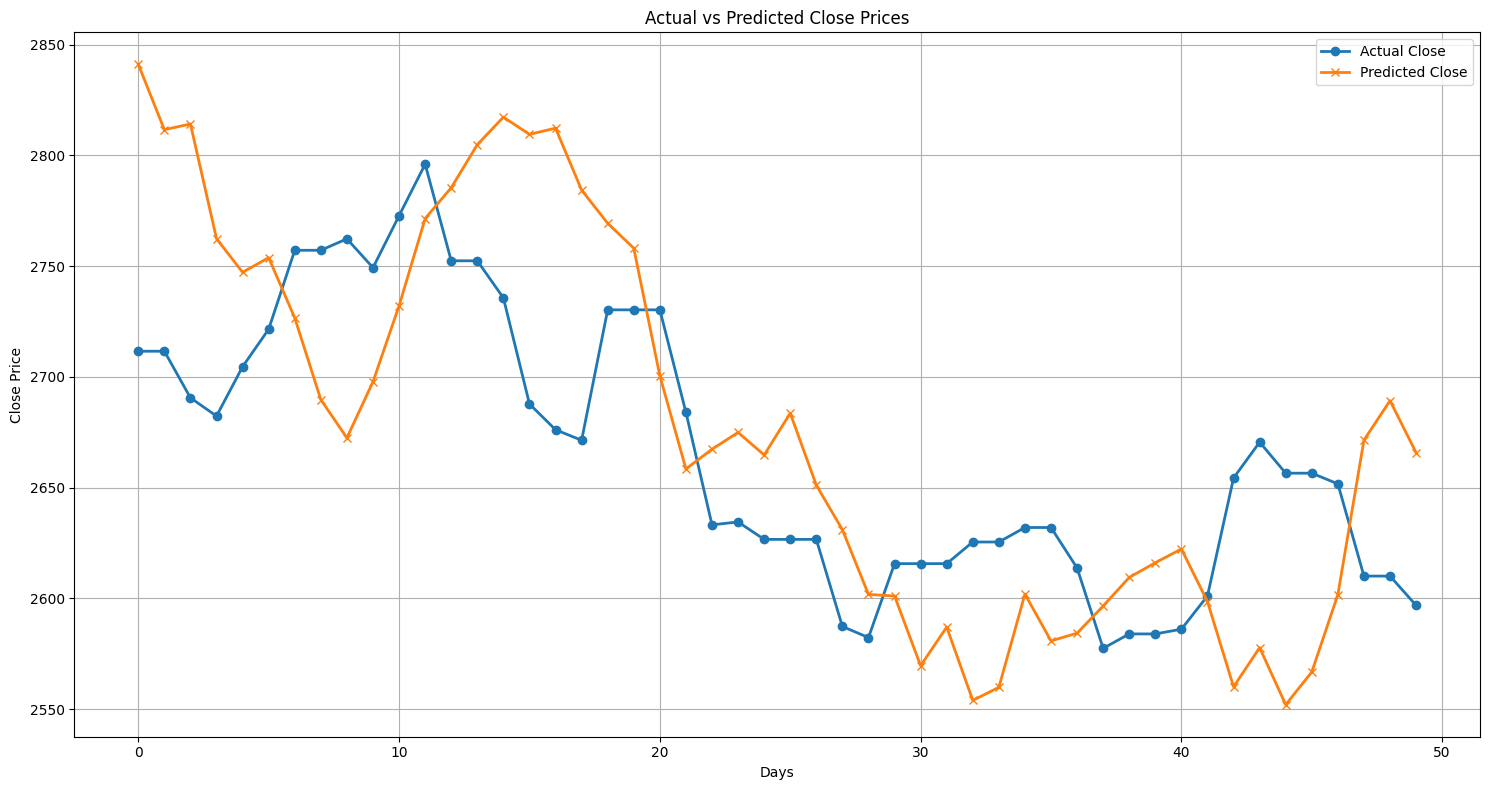

In [13]:
# Plot actual vs predicted close prices
plt.figure(figsize=(15, 8))
plt.plot(range(50), df['close'].values[-50:], label='Actual Close', marker='o', linewidth=2)
plt.plot(range(50), val_predictions_original[-50:, 0, 3], 
         label='Predicted Close', marker='x', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()